<a href="https://colab.research.google.com/github/ruus77/data_analysis/blob/main/Risk_%26_Return_at_the_stock_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [37]:
tickers = " SPY QQQ TLT AAPL MSFT GOOG AMZN NFLX NVDA MA ADBE INTC KRU.WA CDR.WA"

In [38]:
data = yf.download(
    tickers=tickers,
    period="max",
    interval= "1d",
    ignore_tz=True,
    auto_adjust=True
)

[*********************100%***********************]  14 of 14 completed


In [39]:
df = data["Close"].copy()

In [40]:
df.head()

Ticker,AAPL,ADBE,AMZN,CDR.WA,GOOG,INTC,KRU.WA,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,,,,
1980-03-17,NaN,NaN,NaN,NaN,NaN,0.181500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,NaN,NaN,NaN,NaN,NaN,0.180048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,NaN,NaN,NaN,NaN,NaN,0.184404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,NaN,NaN,NaN,NaN,NaN,0.183678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,NaN,NaN,NaN,NaN,NaN,0.177143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df[df.notnull().all(1)].head()

Ticker,AAPL,ADBE,AMZN,CDR.WA,GOOG,INTC,KRU.WA,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,,,,
2011-05-10,10.490528,34.750000,10.1970,8.297428,13.423975,15.623561,31.491405,25.981810,19.736296,33.947144,0.453425,52.117760,104.990410,63.918507
2011-05-11,10.423882,35.400002,10.2190,8.621546,13.245618,15.881348,30.962902,25.707296,19.497952,34.381428,0.455489,51.739136,103.885452,64.284554
2011-05-12,10.404074,35.860001,10.3035,8.565983,13.235725,16.084866,30.955345,26.074230,19.467192,35.110001,0.469930,52.047333,104.379974,63.877762
2011-05-13,10.221847,35.330002,10.1280,8.445595,13.099669,15.881348,30.600496,25.880135,19.244238,35.217144,0.418582,51.430962,103.576340,64.454018
2011-05-16,10.005705,34.389999,9.6255,8.352990,12.824342,16.037378,30.796795,25.801579,18.890564,33.869999,0.405745,50.541641,102.919502,64.813248


In [42]:
df = df["2011-06-01":]

In [43]:
df.head()

Ticker,AAPL,ADBE,AMZN,CDR.WA,GOOG,INTC,KRU.WA,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,,,,
2011-06-01,10.372252,34.119999,9.6200,8.214082,13.001956,14.924799,31.219601,25.941143,18.906034,38.180000,0.438755,50.268673,101.899506,66.431244
2011-06-02,10.389964,34.259998,9.6825,8.149260,13.062810,14.985857,31.098795,26.134315,18.743525,38.814285,0.436691,50.374344,101.791367,65.165733
2011-06-03,10.310110,33.270000,9.4160,7.871443,12.939617,14.741635,30.615595,25.608393,18.503622,39.099998,0.423167,49.617085,100.779091,65.539970
2011-06-06,10.148000,32.840000,9.2845,7.760317,12.889649,14.809476,30.955345,25.133310,18.581009,37.512856,0.414226,49.212059,99.712692,65.043282
2011-06-07,9.967878,33.009998,9.3775,7.769578,12.839432,14.965508,30.955345,25.344053,18.619711,37.669998,0.413997,49.123993,99.650871,65.342697


In [44]:
# Daily returns
df = df / df.shift() - 1

In [45]:
df = df.fillna(0)
df.head()

Ticker,AAPL,ADBE,AMZN,CDR.WA,GOOG,INTC,KRU.WA,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,,,,
2011-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06-02,0.001708,0.004103,0.006497,-0.007892,0.004680,0.004091,-0.003870,0.007447,-0.008596,0.016613,-0.004703,0.002102,-0.001061,-0.019050
2011-06-03,-0.007686,-0.028897,-0.027524,-0.034091,-0.009431,-0.016297,-0.015538,-0.020124,-0.012799,0.007361,-0.030971,-0.015033,-0.009945,0.005743
2011-06-06,-0.015723,-0.012925,-0.013966,-0.014118,-0.003862,0.004602,0.011097,-0.018552,0.004182,-0.040592,-0.021127,-0.008163,-0.010582,-0.007578
2011-06-07,-0.017749,0.005177,0.010017,0.001193,-0.003896,0.010536,0.000000,0.008385,0.002083,0.004189,-0.000553,-0.001790,-0.000620,0.004603


In [54]:
etf = ["SPY",
       "QQQ",
       "TLT"]

stocks = ["AAPL", "ADBE", "AMZN", "GOOG", "MA", "MSFT", "NFLX", "NVDA", "CDR.WA", "KRU.WA"]

# Monthly returns
df.index = pd.to_datetime(df.index)
monthly_ret = df.resample("ME").agg(lambda x: (1+x).prod() - 1);
monthly_ret.head()

Ticker,AAPL,ADBE,AMZN,CDR.WA,GOOG,INTC,KRU.WA,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,,,,
2011-06-30,-0.028480,-0.078253,0.062838,-0.154453,-0.036568,0.007273,-0.020556,0.073684,0.064265,-0.017099,-0.167189,0.001540,0.005720,-0.036256
2011-07-31,0.142745,-0.118639,0.069285,-0.093333,0.166620,0.011713,0.004938,0.002069,0.053442,-0.063092,-0.117619,0.011586,-0.019199,0.041810
2011-08-31,-0.014469,-0.089137,-0.032761,-0.250000,-0.103911,-0.089721,-0.073710,0.087255,-0.023070,-0.116471,-0.037600,-0.050689,-0.054976,0.096674
2011-09-30,-0.023968,-0.025855,-0.024074,-0.298039,-0.043065,0.065534,0.140584,-0.044973,-0.053648,-0.530490,-0.078647,-0.045088,-0.062580,0.120410
2011-10-31,0.061523,0.216798,-0.012579,0.525140,0.150668,0.149953,-0.013953,0.095376,0.069907,-0.275360,0.183054,0.104020,0.109147,-0.038292


In [59]:
monthly_ret.corr()

Ticker,AAPL,ADBE,AMZN,CDR.WA,GOOG,INTC,KRU.WA,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Ticker,,,,,,,,,,,,,,
AAPL,1.000000,0.490891,0.445512,0.202112,0.412495,0.364082,0.296661,0.459663,0.506909,0.172739,0.490483,0.735141,0.618826,0.069850
ADBE,0.490891,1.000000,0.483557,0.229286,0.391167,0.440467,0.305675,0.477208,0.581560,0.341004,0.526265,0.701908,0.642337,0.036351
AMZN,0.445512,0.483557,1.000000,0.190239,0.551046,0.268568,0.205803,0.412018,0.529532,0.402563,0.475416,0.721460,0.598393,0.028348
CDR.WA,0.202112,0.229286,0.190239,1.000000,0.185912,0.137841,0.134012,0.218981,0.149217,0.301974,0.283783,0.331440,0.343558,-0.118146
GOOG,0.412495,0.391167,0.551046,0.185912,1.000000,0.274723,0.316504,0.377512,0.514165,0.198282,0.418286,0.672852,0.604065,-0.012333
INTC,0.364082,0.440467,0.268568,0.137841,0.274723,1.000000,0.174953,0.329620,0.444003,0.126168,0.336962,0.495008,0.489370,0.079005
KRU.WA,0.296661,0.305675,0.205803,0.134012,0.316504,0.174953,1.000000,0.320560,0.240174,0.141226,0.174439,0.385674,0.444075,-0.027002
MA,0.459663,0.477208,0.412018,0.218981,0.377512,0.329620,0.320560,1.000000,0.431662,0.171023,0.312068,0.618208,0.695659,-0.062344
MSFT,0.506909,0.581560,0.529532,0.149217,0.514165,0.444003,0.240174,0.431662,1.000000,0.350176,0.556770,0.768249,0.669329,-0.015476


In [79]:
# Cumulative Returns
ret_cumulative = (1 + monthly_ret).cumprod()
ret_cumulative.sample(10)

Ticker,AAPL,ADBE,AMZN,CDR.WA,GOOG,INTC,KRU.WA,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,,,,
2014-05-31,1.620515,1.741501,1.459794,1.713642,1.767890,1.363305,2.333979,2.405395,1.698290,1.414098,1.123945,1.468690,1.437009,1.354104
2014-03-31,1.408561,1.807397,1.592590,1.727170,1.775705,1.293064,2.002418,2.370300,1.688441,1.190316,1.082106,1.438315,1.408189,1.294802
2013-01-31,1.126017,1.058290,1.376086,0.757610,1.293295,0.998363,1.216445,1.730257,1.093600,0.536582,0.678428,1.114756,1.126373,1.254109
2013-03-31,1.101085,1.206225,1.357357,0.774521,1.335668,1.048952,1.424426,1.807056,1.138189,0.592933,0.723994,1.144150,1.175252,1.270644
2023-07-31,16.177183,14.043136,7.358553,19.438774,6.700960,2.491445,8.678110,12.316624,15.680188,8.069896,94.513740,6.165297,4.219548,1.407559
2019-08-31,3.741194,6.467878,6.158100,28.808465,3.217107,2.597509,3.579846,8.260385,5.688446,5.562975,8.477582,2.830697,2.350573,1.850450
2019-05-31,3.123107,6.123826,6.166280,23.661655,3.015052,2.374957,3.370862,7.348841,5.071608,6.481038,6.742726,2.615418,2.199274,1.624592
2012-06-30,1.521862,0.943106,1.127476,0.578354,1.030625,1.251244,1.119710,1.503383,1.256688,0.264799,0.735081,1.095817,1.046988,1.322879
2022-07-31,12.288920,10.110353,7.212005,11.458609,5.654128,2.110862,5.627239,10.681160,12.395450,3.921871,37.271104,4.838456,3.601996,1.559909


In [66]:
ret_cumulative.shape

(172, 14)

<Axes: xlabel='Date'>

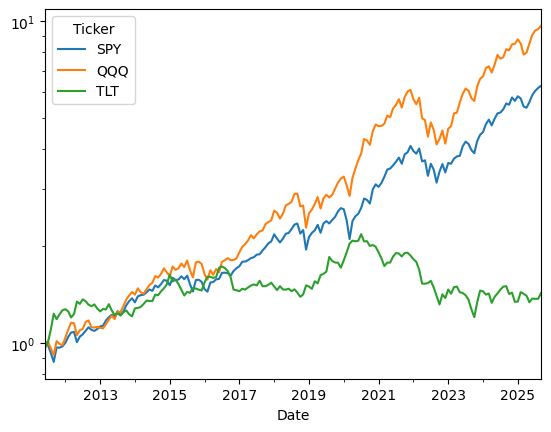

In [77]:
ret_cumulative.plot(y=etf,kind="line", logy=True)

<Axes: xlabel='Date'>

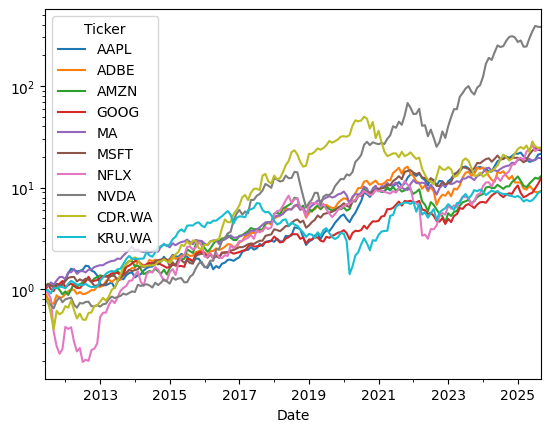

In [78]:
ret_cumulative.plot(y=stocks,kind="line", logy=True)

In [87]:
annualized_returns = (1 + monthly_ret.mean())**12 - 1
annualized_returns.sort_values(ascending=False)

,0
Ticker,
NVDA,0.646917
NFLX,0.427093
CDR.WA,0.368530
AAPL,0.282495
MSFT,0.272270
MA,0.258870
AMZN,0.245483
KRU.WA,0.244824
GOOG,0.225579


<Axes: xlabel='Ticker'>

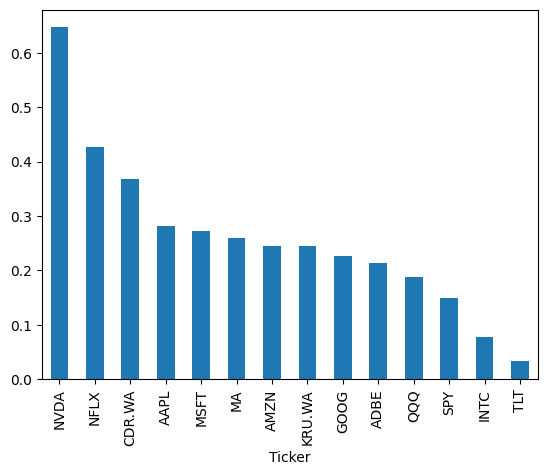

In [88]:
annualized_returns.sort_values(ascending=False).plot(kind="bar")

In [103]:
annualied_std = monthly_ret.std() * np.sqrt(12)
annualied_std

,0
Ticker,
AAPL,0.267236
ADBE,0.281928
AMZN,0.290281
CDR.WA,0.435231
GOOG,0.240383
INTC,0.296290
KRU.WA,0.351351
MA,0.217997
MSFT,0.210430


In [105]:
df_risk_return = pd.DataFrame(
    dict(annualized_returns=annualized_returns,
         annualied_std=annualied_std,
         )
)
df_risk_return.head()

,annualized_returns,annualied_std
Ticker,,
AAPL,0.282495,0.267236
ADBE,0.214459,0.281928
AMZN,0.245483,0.290281
CDR.WA,0.368530,0.435231
GOOG,0.225579,0.240383


In [114]:
#Risk free rate
risk_free_rate = 0.02
df_risk_return["sharp_ratio"] = (df_risk_return["annualized_returns"] - risk_free_rate) / df_risk_return['annualied_std']
df_risk_return.sort_values(by="sharp_ratio", ascending=False)

,annualized_returns,annualied_std,Sharp Ratio,sharp_ratio
Ticker,,,,
NVDA,0.646917,0.425031,1.474990,1.474990
MSFT,0.272270,0.210430,1.198828,1.198828
MA,0.258870,0.217997,1.095748,1.095748
AAPL,0.282495,0.267236,0.982258,0.982258
QQQ,0.188499,0.172018,0.979544,0.979544
SPY,0.148697,0.144782,0.888897,0.888897
GOOG,0.225579,0.240383,0.855214,0.855214
CDR.WA,0.368530,0.435231,0.800794,0.800794
NFLX,0.427093,0.522614,0.778955,0.778955


In [116]:
prev_peak = ret_cumulative.cummax()
drawdown = (ret_cumulative - prev_peak) / prev_peak
drawdown

Ticker,AAPL,ADBE,AMZN,CDR.WA,GOOG,INTC,KRU.WA,MA,MSFT,NFLX,NVDA,QQQ,SPY,TLT
Date,,,,,,,,,,,,,,
2011-06-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-07-31,0.000000,-0.118639,0.000000,-0.093333,0.000000,0.000000,0.000000,0.000000,0.000000,-0.063092,-0.117619,0.000000,-0.019199,0.000000
2011-08-31,-0.014469,-0.197202,-0.032761,-0.320000,-0.103911,-0.089721,-0.073710,0.000000,-0.023070,-0.172214,-0.150797,-0.050689,-0.073119,0.000000
2011-09-30,-0.038091,-0.217958,-0.056046,-0.522667,-0.142501,-0.030067,0.000000,-0.044973,-0.075480,-0.611347,-0.217584,-0.093492,-0.131124,0.000000
2011-10-31,0.000000,-0.048413,-0.067921,-0.272000,-0.013303,0.000000,-0.013953,0.000000,-0.010850,-0.718366,-0.074359,0.000000,-0.036288,-0.038292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-31,-0.188922,-0.350890,-0.150976,-0.550900,-0.174845,-0.654166,-0.233890,-0.001700,0.000000,0.000000,-0.048914,-0.029685,-0.040531,-0.385325
2025-06-30,-0.171477,-0.395005,-0.091423,-0.429366,-0.152154,-0.603750,-0.215133,-0.042035,0.000000,0.000000,0.000000,0.000000,0.000000,-0.368950
2025-07-31,-0.147412,-0.437120,-0.030722,-0.489518,-0.062692,-0.641942,-0.157750,-0.025956,0.000000,-0.129139,0.000000,0.000000,0.000000,-0.370131


<Axes: xlabel='Date'>

<Figure size 1000x800 with 0 Axes>

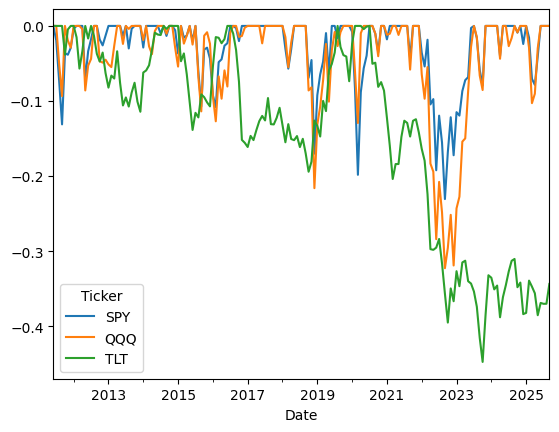

In [129]:
plt.figure(figsize=(10,8))
drawdown.plot(y=etf, kind="line")

<Axes: xlabel='Date'>

<Figure size 1000x800 with 0 Axes>

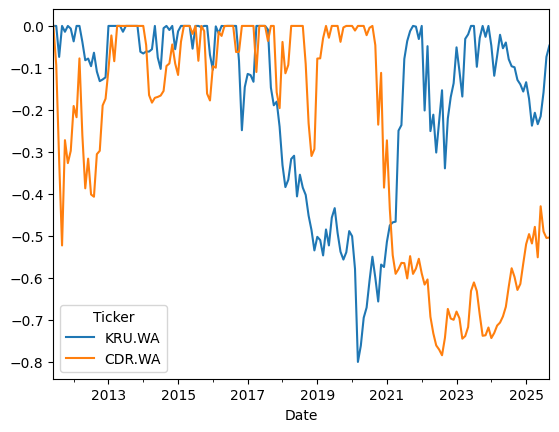

In [130]:
plt.figure(figsize=(10,8))
drawdown.plot(y=["KRU.WA", "CDR.WA"], kind="line")

In [132]:
df_risk_return["Max Drawdown"] = drawdown.min()*-1
df_risk_return

,annualized_returns,annualied_std,Sharp Ratio,sharp_ratio,Max Drawdown
Ticker,,,,,
AAPL,0.282495,0.267236,0.982258,0.982258,0.396062
ADBE,0.214459,0.281928,0.689745,0.689745,0.579490
AMZN,0.245483,0.290281,0.776775,0.776775,0.552120
CDR.WA,0.368530,0.435231,0.800794,0.800794,0.784087
GOOG,0.225579,0.240383,0.855214,0.855214,0.407657
INTC,0.078200,0.296290,0.196429,0.196429,0.654166
KRU.WA,0.244824,0.351351,0.639884,0.639884,0.799967
MA,0.258870,0.217997,1.095748,1.095748,0.280181
MSFT,0.272270,0.210430,1.198828,1.198828,0.302068


<Axes: xlabel='annualized_returns', ylabel='annualied_std'>

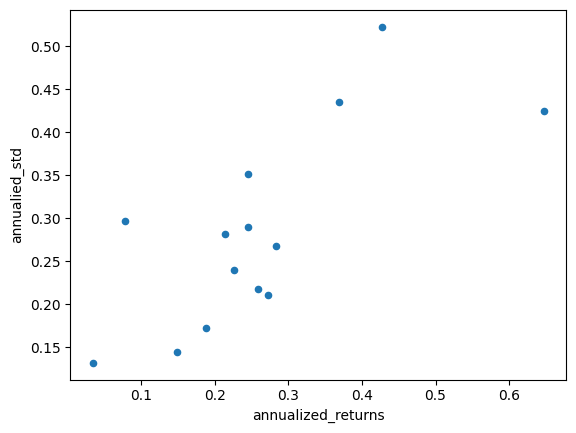

In [137]:
df_risk_return.plot(x="annualized_returns", y="annualied_std", kind="scatter")

In [141]:
df_risk_return.loc[df_risk_return["annualized_returns"] > 0.5, :]

,annualized_returns,annualied_std,Sharp Ratio,sharp_ratio,Max Drawdown
Ticker,,,,,
NVDA,0.646917,0.425031,1.47499,1.47499,0.628697
